In [ ]:
6import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
Data = {'Country': ['USA','Canada','Germany','UK','France'],
        'GDP': [45000,42000,52000,49000,47000]}
  
df = pd.DataFrame(Data)
#df = pd.DataFrame(Data,columns=['Country','GDP_STATE'])

In [ ]:
df.head()

,Country,GDP
0,USA,45000
1,Canada,42000
2,Germany,52000
3,UK,49000
4,France,47000


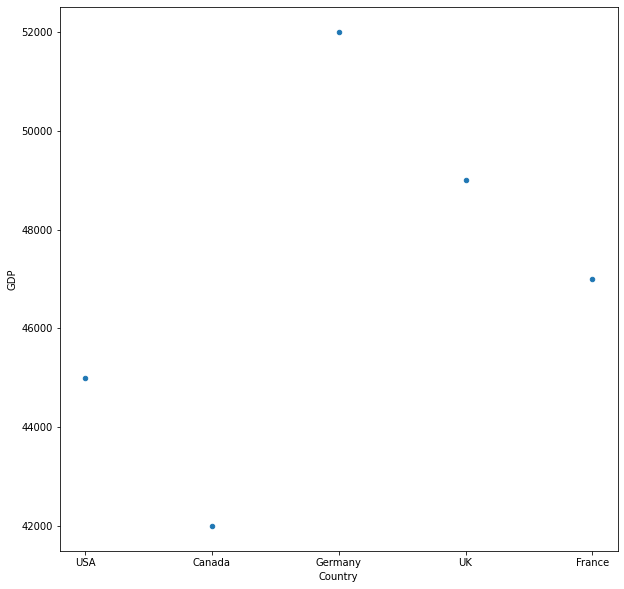

In [ ]:
df.plot(x ='Country',y='GDP', figsize=(
    10, 10),
        kind = 'scatter');
#plt.show()

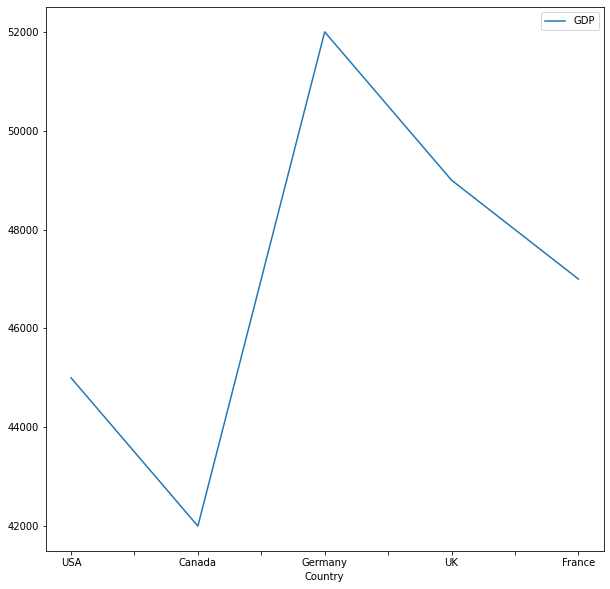

In [ ]:
df.plot(x ='Country',y='GDP', figsize=(10, 10),
        kind = 'line');
#plt.show()

In [ ]:
Data = {'Tasks': [300,500,700]}
df = pd.DataFrame(Data,columns=['Tasks'])

In [ ]:
df.head()

,Tasks
0,300
1,500
2,700


In [ ]:
df = pd.DataFrame(Data,columns=['Tasks'],
                  index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])
df.head()

,Tasks
Tasks Pending,300
Tasks Ongoing,500
Tasks Completed,700


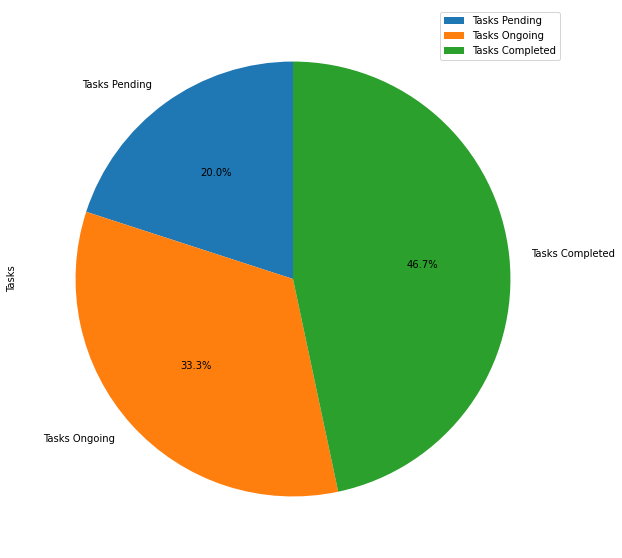

In [ ]:
df.plot.pie(y='Tasks',figsize=(10, 10),autopct='%1.1f%%',
            startangle=90);

In [ ]:
### Groupby

In [ ]:
url_superficie = "https://it.wikipedia.org/wiki/Primi_100_comuni_italiani_per_superficie"

In [ ]:
comuni_superficie = pd.read_html(url_superficie,
                                 attrs={"class":"wikitable"},
                                 header=0)

comuni_superficie = comuni_superficie[0]

In [ ]:
comuni_superficie = comuni_superficie.rename(columns={'Superficie (km²)': 'Superficie'})

In [ ]:
comuni_superficie.head()

,Pos.,Comune,Regione,Provincia,Superficie
0,1,Roma,Lazio,Roma,128736
1,2,Ravenna,Emilia-Romagna,Ravenna,65382
2,3,Cerignola,Puglia,Foggia,59393
3,4,Noto,Sicilia,Siracusa,55499
4,5,Sassari,Sardegna,Sassari,54704


In [ ]:
comuni_superficie.groupby('Regione').mean()

,Pos.,Superficie
Regione,,
Abruzzo,9.000000,47391.000000
Basilicata,54.666667,29641.000000
Calabria,52.333333,28937.666667
Emilia-Romagna,56.200000,31154.100000
Lazio,29.250000,56263.750000
Liguria,80.000000,24029.000000
Lombardia,94.500000,22701.500000
Marche,84.333333,24168.000000
Puglia,46.210526,33034.263158


In [ ]:
reg = comuni_superficie.groupby('Regione')
reg.aggregate([np.mean, np.std, pd.Series.count])

Pos.             ...    Superficie      
                          mean        std  ...           std count
Regione                                    ...                    
Abruzzo               9.000000        NaN  ...           NaN     1
Basilicata           54.666667  33.321665  ...   8419.030110     3
Calabria             52.333333  26.407070  ...   5408.599850     3
Emilia-Romagna       56.200000  30.828558  ...  13146.217719    10
Lazio                29.250000  24.743686  ...  48688.754926     4
Liguria              80.000000        NaN  ...           NaN     1
Lombardia            94.500000   2.121320  ...     40.305087     2
Marche               84.333333  24.542480  ...   2632.717987     3
Puglia               46.210526  29.628400  ...  10048.492396    19
Sardegna             62.625000  32.762947  ...  11275.484278     8
Sicilia              46.300000  27.380554  ...   9656.570331    20
Toscana              52.142857  26.590505  ...   7114.648125    14
Trentino-Alto Adige  56.000000  24.041631  ...   3877.773588     2
Umbria               32.142857  20.860078  ...   9897.267396     7
Veneto               49.000000  29.461840  ...   9300.741315     3

[15 rows x 6 columns]

In [ ]:
comuni_superficie.groupby('Regione')['Superficie'].count()

Regione
Abruzzo                 1
Basilicata              3
Calabria                3
Emilia-Romagna         10
Lazio                   4
Liguria                 1
Lombardia               2
Marche                  3
Puglia                 19
Sardegna                8
Sicilia                20
Toscana                14
Trentino-Alto Adige     2
Umbria                  7
Veneto                  3
Name: Superficie, dtype: int64

In [ ]:
comuni_superficie.groupby('Regione')['Superficie'].count().sort_values(ascending=False)

Regione
Sicilia                20
Puglia                 19
Toscana                14
Emilia-Romagna         10
Sardegna                8
Umbria                  7
Lazio                   4
Veneto                  3
Marche                  3
Calabria                3
Basilicata              3
Trentino-Alto Adige     2
Lombardia               2
Liguria                 1
Abruzzo                 1
Name: Superficie, dtype: int64

In [ ]:
## PETS

In [ ]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


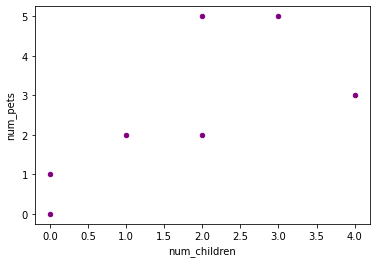

In [ ]:
df.plot(kind='scatter',x='num_children',y='num_pets',color='purple');

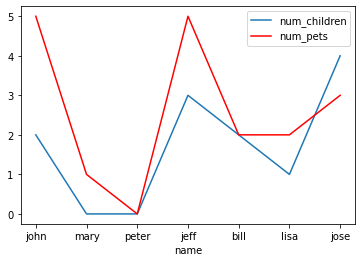

In [ ]:
# gca stands for 'get current axis'
ax = plt.gca()
df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax);

#plt.show()

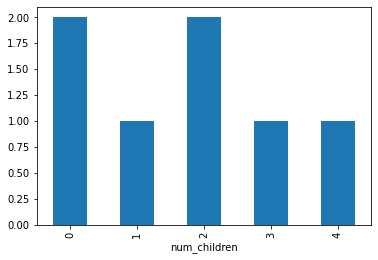

In [ ]:
df.groupby('num_children').size().plot(kind='bar');

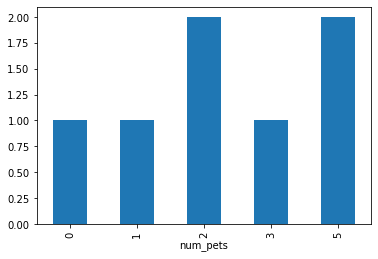

In [ ]:
df.groupby('num_pets').size().plot(kind='bar');

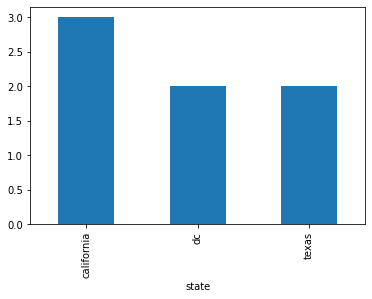

In [ ]:
df.groupby('state').size().plot(kind='bar');

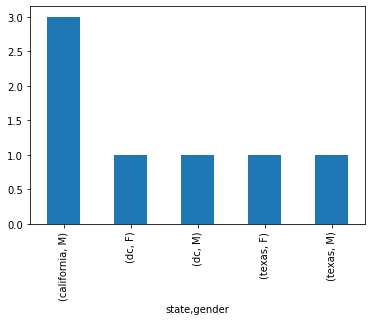

In [ ]:
df.groupby(['state','gender']).size().plot(kind='bar');

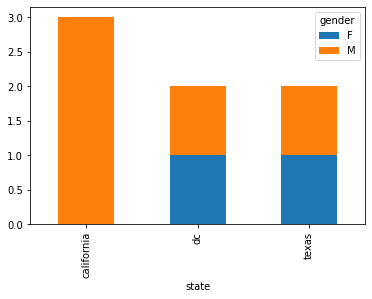

In [ ]:
df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True);

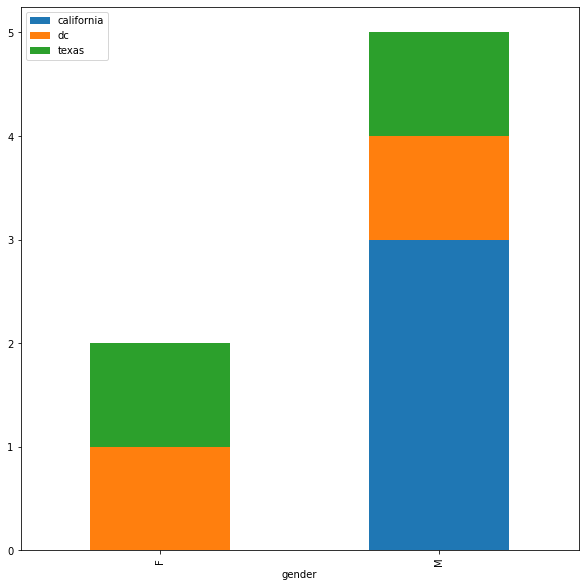

In [ ]:
df.groupby(['gender','state']).size().unstack().plot(kind='bar',
                                                     stacked=True,
                                                     figsize=(10, 10))
plt.legend(loc='upper left');